Import libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Import data and perform the required formatting.

In [2]:
data = pd.read_csv('pi-data.csv')
headers = list(data.columns)

# convert the values to the appropriate type
data['Date & Time'] = pd.to_datetime(data['Date & Time'], format='%d/%m/%Y %H:%M')
data[headers[1:]] = data[headers[1:]].apply(pd.to_numeric, errors='coerce', axis=1)

Try plotting some of the data in Seaborn.

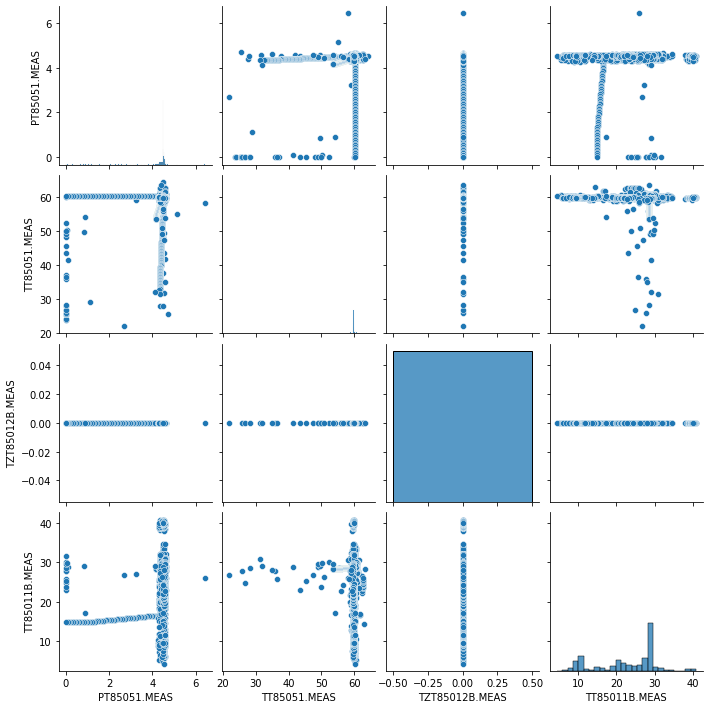

In [3]:
import seaborn as sns

sns.pairplot(data[headers[7:11]])

Plot all the columns vs. time.

Then save the figures.

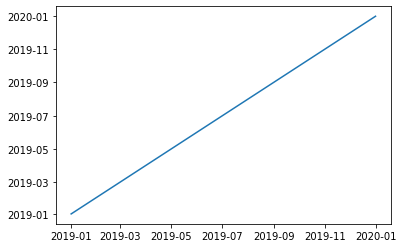

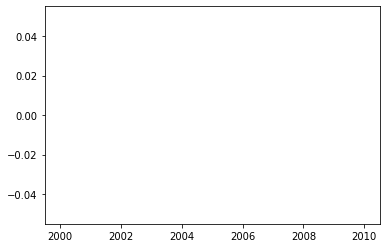

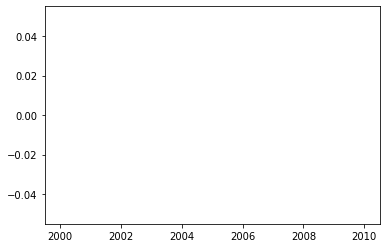

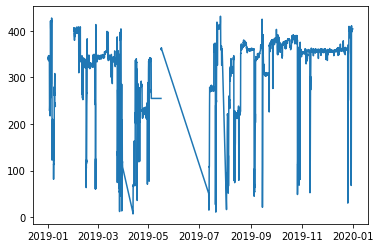

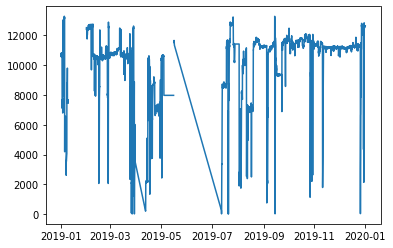

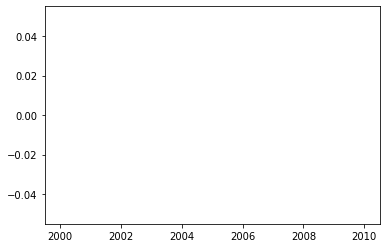

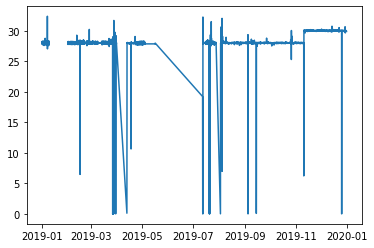

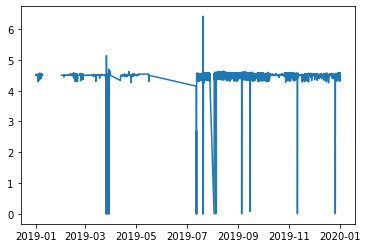

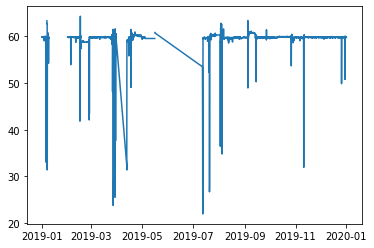

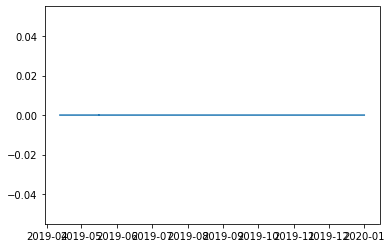

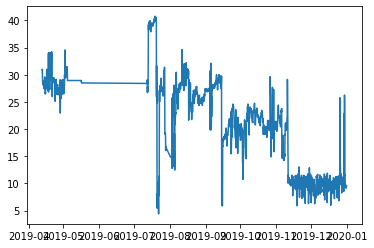

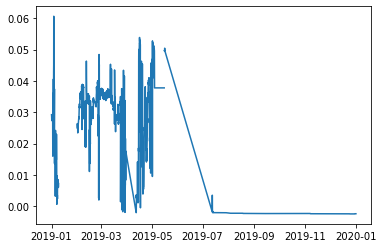

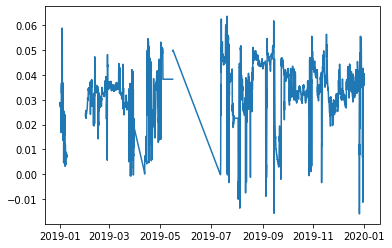

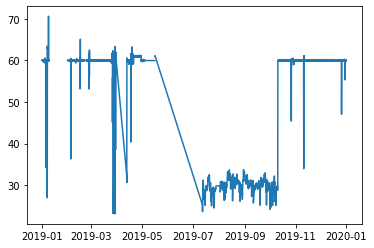

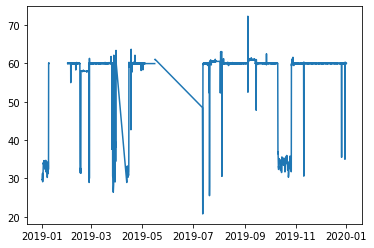

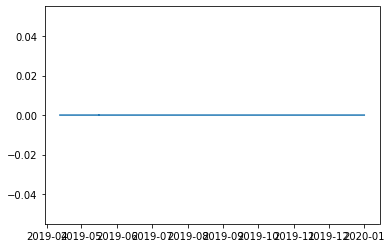

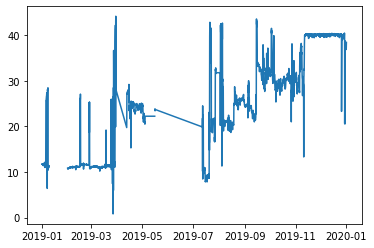

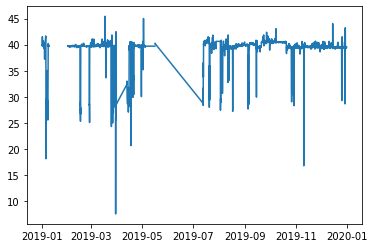

In [4]:
# plot all the columns
for header in headers:
    plt.figure()
    plt.plot(data['Date & Time'], data[header])
    
    plt.savefig(header+'_temp.png')

Install docx library as it doesn't come with Colab by default.

In [5]:
!pip install python-docx

Compile and put all the figures together in a Word document.

In [6]:
import glob
from docx import Document

figures = glob.glob("*_temp.png")

doc = Document()
doc.add_heading('Header')

for figure in figures:
    doc.add_picture(figure)

doc.save('my_doc.docx')

Delete all the temp files.

In [7]:
import os

figures = glob.glob("*_temp.png")
for figure in figures:
    os.remove(figure)